In [45]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.stats
%matplotlib inline

In [62]:
# Let's load an audio file, make a spectrogram, and analyse it
audio = librosa.load('./bbcwoodland1/BBC_01_0344__1.wav')

In [80]:
gram = abs(librosa.core.stft(audio[0]))

In [34]:
gram.shape

(1025, 2585)

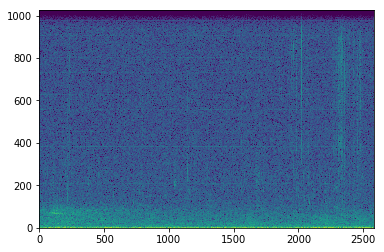

In [91]:
def plotit(gram):
    plt.imshow(librosa.amplitude_to_db(gram, ref=np.max), origin='lower', aspect='auto')
    
plotit(gram)

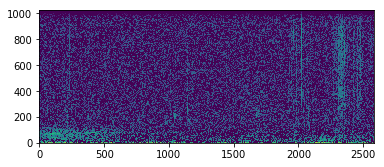

In [82]:
# median-filtering is a good simple way to clean up a spectrogram a bit
gramb = np.maximum(gram - np.median(gram, axis=1, keepdims=True), 1e-3)
plotit(gramb)

In [66]:
# Here we'll calculate entropy of each frequency bin separately
def fentropy(gram):
    return np.array([scipy.stats.entropy(row) for row in gram])

def aci(gram):
    return np.array([np.sum(np.abs(row[1:] - row[:-1]))/np.sum(row) for row in gram])

In [56]:
# NOW let's do it to all of the audio files...
multigram = [abs(librosa.core.stft(librosa.load('./bbcwoodland1/BBC_01_0344__%i.wav' % i)[0])) for i in range(1,181)]

In [57]:
multigram = [np.maximum(agram - np.median(agram, axis=1, keepdims=True), 1e-3) for agram in multigram]

In [60]:
multifentropy = np.array([fentropy(agram) for agram in multigram]).T

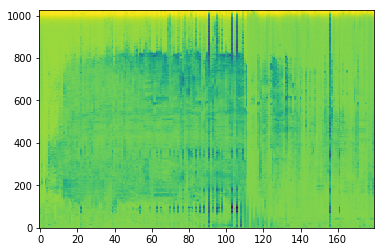

In [93]:
# Here we plot the entropy-per-frequency-bin. the y-axis is frequency. the x-axis is which 1-min soundfile we're seeing
plotit(multifentropy)

In [67]:
multiaci = np.array([aci(agram) for agram in multigram]).T

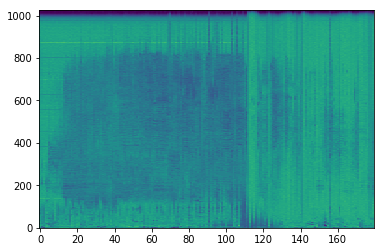

In [94]:
plotit(np.exp(multiaci))

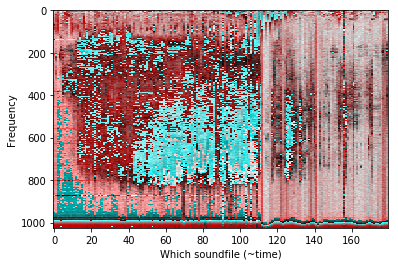

In [87]:
# let's plot a combined false-colour spectrogram, with red channel as entropy, other channels as aci
plt.imshow(np.transpose([multifentropy, np.exp(multiaci), np.exp(multiaci)], axes=(1,2,0)), aspect='auto')
plt.xlabel('Which soundfile (~time)')
plt.ylabel('Frequency')

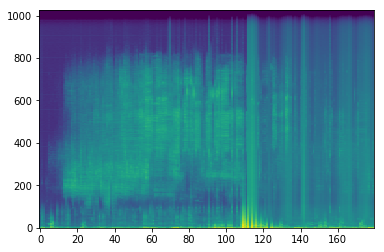

In [95]:
# maybe let's compare this against the boring way, simply looking at total magnitude:
mags = np.array([np.sum(agram, axis=1) for agram in multigram]).T
plotit(mags)